# Integrate with Together.ai

Pixeltable's Together.ai integration enables you to access advanced large language models (LLMs) hosted on the Together.ai platform.

### Prerequisites
- A Together account with an API key (https://api.together.ai/settings/api-keys)
- The `together` and `fireworks` Python library installed.

### Important Notes

Together.ai usage may incur costs based on your Together.ai plan.
Be mindful of sensitive data and consider security measures when integrating with external services.

In [ ]:
# Required librairies
%pip install pixeltable
%pip install --upgrade together

In [3]:
# Initialize Pixeltable client and create a directory
import os
import getpass
import pixeltable as pxt
cl = pxt.Client()
cl.create_dir('dir_together', ignore_errors=True)

Connected to Pixeltable database at: postgresql://postgres:@/pixeltable?host=/root/.pixeltable/pgdata


Securely store your Together.ai API key by not hardcoding it into the notebook.

In [4]:
# Dynamically input your API Key as needed
if "TOGETHER_API_KEY" not in os.environ:
    os.environ["TOGETHER_API_KEY"] = getpass.getpass("Together API Key:")

Together API Key:··········


## Completions

In [5]:
from pixeltable.functions.together import completions

Create a Table: In Pixeltable, create a table with columns to  represent your input data and the columns where you want to store the results from Fireworks.

In [6]:
 # Create a table in Pixeltable and pick a model hosted on Together with some parameters
complete = cl.create_table('test_tbl', {'input': pxt.StringType()})

complete.add_column(output=completions(
    prompt=complete.input,
    model='mistralai/Mixtral-8x7B-v0.1',
    max_tokens=300,
    stop=['\n'],
    temperature=0.7,
    top_p=0.9,
    top_k=40,
    repetition_penalty=1.1,
    logprobs=1,
    echo=True,
    n=3,
))

Created table `test_tbl`.
Added 0 column values with 0 errors.


UpdateStatus(num_rows=0, num_computed_values=0, num_excs=0, updated_cols=[], cols_with_excs=[])

In [7]:
complete.describe()

Column Name,Type,Computed With
input,string,
output,json,"completions(input, model='mistralai/Mixtral-8x7B-v0.1', temperature=0.7, echo=True, top_k=40, logprobs=1, max_tokens=300, top_p=0.9, repetition_penalty=1.1, stop=[ ], n=3)"


In [8]:
# Parse the bot response (output) into a new column
complete['response'] = complete.output.choices[0].text

Added 0 column values with 0 errors.


In [9]:
# Start a conversation
question = complete.insert(input="I want to rule")
answer = complete.select(complete.input, complete.response).show()
answer

Computing cells: 100%|████████████████████████████████████████████| 2/2 [00:00<00:00,  3.01 cells/s]
Inserting rows into `test_tbl`: 1 rows [00:00, 133.91 rows/s]
Computing cells: 100%|████████████████████████████████████████████| 2/2 [00:00<00:00,  2.86 cells/s]
Inserted 1 row with 0 errors.


input,response
I want to rule,the world!


## Chat Completions

In [10]:
from pixeltable.functions.together import chat_completions

In [11]:
 # Create a table in Pixeltable and pick a model hosted on Together with some parameters
chat = cl.create_table('table_chat', {'input': pxt.StringType()})
messages = [{'role': 'user', 'content': chat.input}]
chat.add_column(output=chat_completions(
    messages=messages,
    model='mistralai/Mixtral-8x7B-Instruct-v0.1',
    max_tokens=300,
    stop=['\n'],
    temperature=0.7,
    top_p=0.9,
    top_k=40,
    repetition_penalty=1.1,
    logprobs=1,
    echo=True,
    n=3,
    #safety_model='Meta-Llama/Llama-Guard-7b',
    response_format={'type': 'json_object'}
))

Created table `table_chat`.
Added 0 column values with 0 errors.


UpdateStatus(num_rows=0, num_computed_values=0, num_excs=0, updated_cols=[], cols_with_excs=[])

In [24]:
chat.describe()

Column Name,Type,Computed With
input,string,
output,json,"chat_completions([{'role': 'user', 'content': input}], model='mistralai/Mixtral-8x7B-Instruct-v0.1', temperature=0.7, echo=True, top_k=40, logprobs=1, max_tokens=300, top_p=0.9, repetition_penalty=1.1, stop=[ ], n=3, response_format={'type': 'json_object'})"
response,json,output.choices[0].message


In [13]:
# Parse the bot response (output) into a new column
chat['response'] = chat.output.choices[0].message

Added 0 column values with 0 errors.


In [14]:
# Start a conversation
question = chat.insert(input="Can you make me a coffee?")
answer = chat.select(chat.input, chat.response).show()
answer

Computing cells: 100%|████████████████████████████████████████████| 2/2 [00:00<00:00,  4.59 cells/s]
Inserting rows into `table_chat`: 1 rows [00:00, 173.45 rows/s]
Computing cells: 100%|████████████████████████████████████████████| 2/2 [00:00<00:00,  4.34 cells/s]
Inserted 1 row with 0 errors.


input,response
Can you make me a coffee?,"{'role': 'assistant', 'content': ' ', 'tool_calls': None}"


## Embeddings

In [15]:
from pixeltable.functions.together import embeddings

In [16]:
embed = cl.create_table('test_embeddings', {'input': pxt.StringType()})
embed.add_column(embed=embeddings(
      input=embed.input,
      model='togethercomputer/m2-bert-80M-8k-retrieval'))

Created table `test_embeddings`.
Added 0 column values with 0 errors.


UpdateStatus(num_rows=0, num_computed_values=0, num_excs=0, updated_cols=[], cols_with_excs=[])

In [17]:
embed.insert(input='Together AI provides a variety of embeddings models.')

Computing cells: 100%|████████████████████████████████████████████| 1/1 [00:01<00:00,  1.40s/ cells]
Inserting rows into `test_embeddings`: 1 rows [00:00, 80.64 rows/s]
Computing cells: 100%|████████████████████████████████████████████| 1/1 [00:01<00:00,  1.44s/ cells]
Inserted 1 row with 0 errors.


UpdateStatus(num_rows=1, num_computed_values=1, num_excs=0, updated_cols=[], cols_with_excs=[])

In [18]:
embed.describe()
embed.head()

Column Name,Type,Computed With
input,string,
embed,"array((None,), dtype=FLOAT)","together.embeddings(input, model='togethercomputer/m2-bert-80M-8k-retrieval')"


input,embed
Together AI provides a variety of embeddings models.,"[0.016232457, -0.20974171, 0.20096539, 0.15308, -0.33934394, 0.1641776, 0.28299868, 0.15103284, 0.13662423, 0.0044361604, 0.052466832, -0.13507378, -0.12935488, 0.124423794, 0.023793366, -0.20435934, 0.22676797, 0.1209625, -0.034715235, 0.16465378, -0.16237547, -0.16297175, 0.24655177, 0.314733, 0.061162468, -0.27838704, 0.07632538, 0.03980723, 0.03652375, -0.17735523, -0.042062216, -0.14621857, -0.10076542, 0.056929983, 0.011296147, 0.11708491, 0.06328845, 0.16986755, 0.14596735, 0.13139556, -0.13966292, -0.018491898, 0.049842115, -0.12972802, -0.061177313, 0.18479164, -0.25599495, 0.12789905, 0.06758038, -0.17133054, -0.2111011, -0.16792905, -0.21141277, -0.09853814, 0.003973395, -0.21781975, -0.05421263, 0.17835066, 0.073698185, -0.022551578, -0.15593226, 0.08124307, 0.1281974, 0.0080542425, -0.03267917, -0.12479671, -0.010064738, -0.0146909, 0.0007352329, 0.29774678, -0.044923063, -0.19443528, 0.069626346, 0.005396751, -0.08850598, 0.25516367, 0.100371145, -0.04594106, -0.056460228, 0.0725022, -0.005882636, -0.13697596, 0.1823212, 0.15798046, 0.1808659, -0.030637182, 0.15887189, -0.0067441277, 0.22216141, -0.24038352, -0.040920116, 0.045062836, -0.08090567, 0.20003206, -0.15341952, 0.0032852183, 0.11725804, 0.10148666, 0.037926383, 0.13792464, ...]"


## Image Generations

In [19]:
from pixeltable.functions.together import image_generations

In [20]:
image= cl.create_table('image_generation', {'input': pxt.StringType(), 'negative_prompt': pxt.StringType(nullable=True)}
  )
image.add_column(img=image_generations(image.input, model='runwayml/stable-diffusion-v1-5'))
image.add_column(img_2=image_generations(
image.input,
model='stabilityai/stable-diffusion-2-1',
steps=30,
seed=4178780,
height=768,
width=512,
negative_prompt=image.negative_prompt
  ))

Created table `image_generation`.
Added 0 column values with 0 errors.
Added 0 column values with 0 errors.


UpdateStatus(num_rows=0, num_computed_values=0, num_excs=0, updated_cols=[], cols_with_excs=[])

In [21]:
# Start generating Images
image.insert([
  {'input': 'A friendly dinosaur playing tennis in a cornfield'},
  {'input': 'A friendly dinosaur playing tennis in a cornfield',
    'negative_prompt': 'tennis court'}
])

Inserting rows into `image_generation`: 2 rows [00:00, 88.97 rows/s]
Inserted 2 rows with 0 errors.


UpdateStatus(num_rows=2, num_computed_values=0, num_excs=0, updated_cols=[], cols_with_excs=[])

In [22]:
image.describe()
inputs = image.select(image.input, image.negative_prompt).show()
inputs

Column Name,Type,Computed With
input,string,
negative_prompt,string,
img,image,"image_generations(input, model='runwayml/stable-diffusion-v1-5')"
img_2,image,"image_generations(input, negative_prompt=negative_prompt, width=512, steps=30, seed=4178780, model='stabilityai/stable-diffusion-2-1', height=768)"


input,negative_prompt
A friendly dinosaur playing tennis in a cornfield,None
A friendly dinosaur playing tennis in a cornfield,tennis court


input,negative_prompt,img,img_2
A friendly dinosaur playing tennis in a cornfield,None,,
A friendly dinosaur playing tennis in a cornfield,tennis court,,

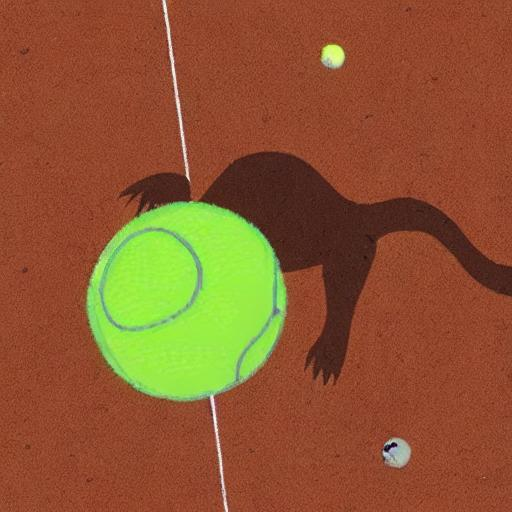
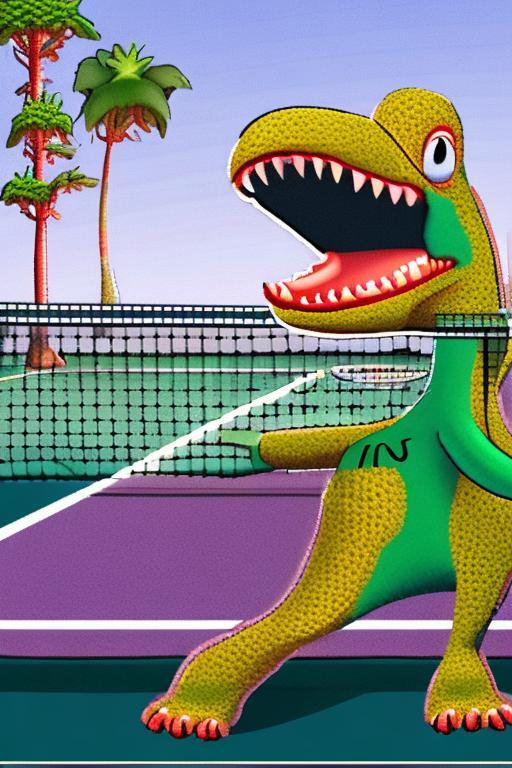
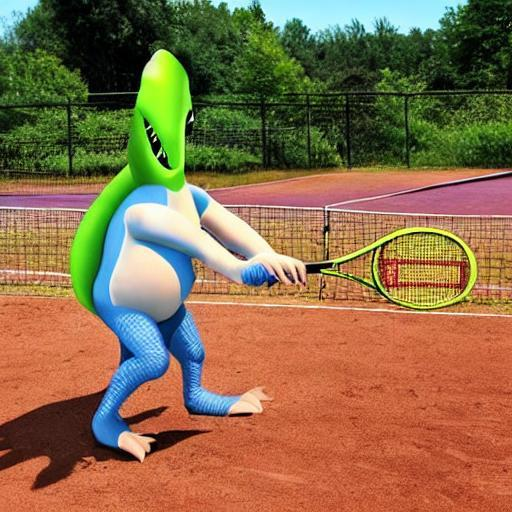
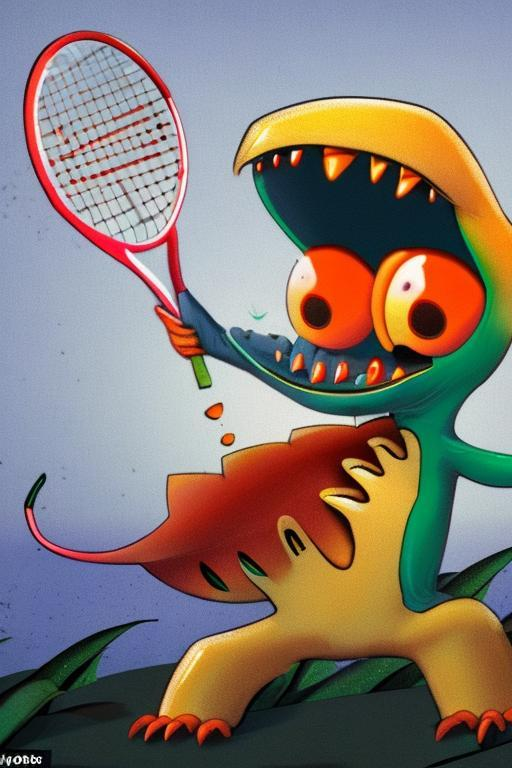

In [23]:
image.head(3)

### Learn More

To learn more about advanced techniques like RAG operations in Pixeltable, visit: https://pixeltable.readme.io/docs/rag-operations-in-pixeltable.

You can also look at how to work with images in Pixeltable: https://pixeltable.readme.io/docs/working-with-images

If you have any questions, don't hesitate to reach out.